In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data from CSV files
leicesterData = pd.read_csv('Data/Leicester_2023_24.csv')
readingData = pd.read_csv('Data/Reading_2005_06.csv')

# Ensure the \Charts directory exists
charts_dir = 'Charts'
if not os.path.exists(charts_dir):
    os.makedirs(charts_dir)

In [15]:
print(leicesterData.tail())  # Displays the last 5 rows of data1
print(readingData.tail())  # Displays the last 5 rows of data2


    GameWeek        Date  Points
27        28  2024-01-22       1
28        29  2024-01-30       3
29        30  2024-02-03       3
30        31  2024-02-10       3
31        32  2024-02-13       3
    GameWeek        Date  Points
41        42  2006-04-08       3
42        43  2006-04-15       1
43        44  2006-04-17       3
44        45  2006-04-22       1
45        46  2006-04-30       3


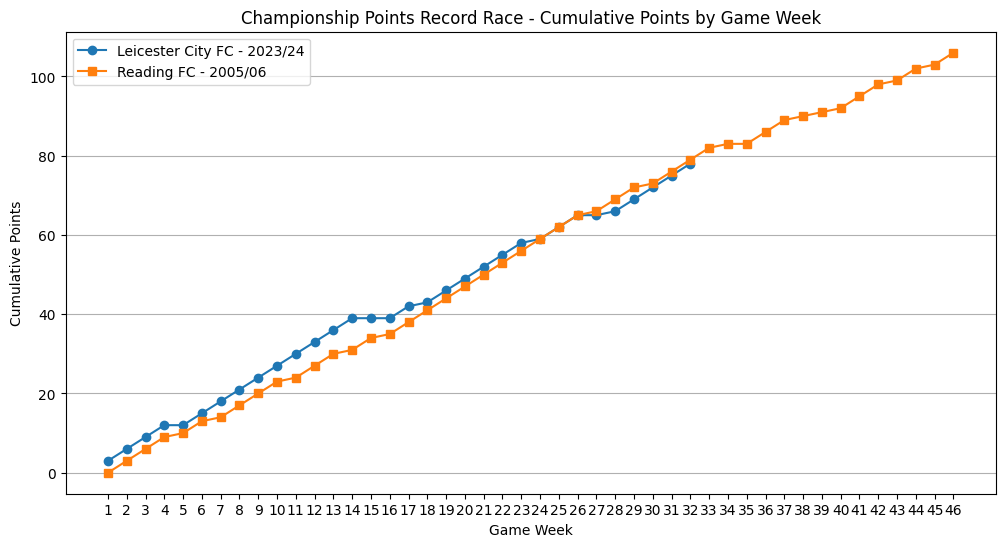

In [16]:

# Calculate the cumulative sum of points for each team
leicesterData['CumulativePoints'] = leicesterData['Points'].cumsum()
readingData['CumulativePoints'] = readingData['Points'].cumsum()

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size for better readability

plt.plot(leicesterData['GameWeek'], leicesterData['CumulativePoints'], marker='o', linestyle='-', label='Leicester City FC - 2023/24')
plt.plot(readingData['GameWeek'], readingData['CumulativePoints'], marker='s', linestyle='-', label='Reading FC - 2005/06')

plt.title('Championship Points Record Race - Cumulative Points by Game Week')
plt.xlabel('Game Week')
plt.ylabel('Cumulative Points')
plt.xticks(range(1, max(leicesterData['GameWeek'].max(), readingData['GameWeek'].max()) + 1))  # Ensure all game weeks are shown
plt.legend()
plt.grid(axis='y')  # Add grid for better readability

plt.savefig(f'{charts_dir}/cumulative_points_comparison.png', bbox_inches='tight')

plt.show()

In [17]:
# print(leicesterData['CumulativePoints'])
# print(readingData['CumulativePoints'])

leicesterCumulativeData = leicesterData[['GameWeek', 'CumulativePoints']].rename(columns={'CumulativePoints': 'Leicester Points'})
readingCumulativeData = readingData[['GameWeek', 'CumulativePoints']].rename(columns={'CumulativePoints': 'Reading Points'})

# Assuming an outer join to include all game weeks from both datasets
merged_data = pd.merge(leicesterCumulativeData, readingCumulativeData, on='GameWeek', how='outer')

merged_data.sort_values('GameWeek', inplace=True)  # Ensure the data is sorted by GameWeek
merged_data.fillna('', inplace=True)  # Forward fill missing values

print(merged_data)

from tabulate import tabulate



    GameWeek Leicester Points  Reading Points
0          1              3.0               0
1          2              6.0               3
2          3              9.0               6
3          4             12.0               9
4          5             12.0              10
5          6             15.0              13
6          7             18.0              14
7          8             21.0              17
8          9             24.0              20
9         10             27.0              23
10        11             30.0              24
11        12             33.0              27
12        13             36.0              30
13        14             39.0              31
14        15             39.0              34
15        16             39.0              35
16        17             42.0              38
17        18             43.0              41
18        19             46.0              44
19        20             49.0              47
20        21             52.0     

C:\Users\MarkEdward\AppData\Local\Temp\ipykernel_20656\3305848969.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data.fillna('', inplace=True)  # Forward fill missing values


In [18]:
markdown_table = tabulate(merged_data, headers='keys', tablefmt='pipe', showindex=False)
print(markdown_table)

|   GameWeek | Leicester Points   |   Reading Points |
|-----------:|:-------------------|-----------------:|
|          1 | 3.0                |                0 |
|          2 | 6.0                |                3 |
|          3 | 9.0                |                6 |
|          4 | 12.0               |                9 |
|          5 | 12.0               |               10 |
|          6 | 15.0               |               13 |
|          7 | 18.0               |               14 |
|          8 | 21.0               |               17 |
|          9 | 24.0               |               20 |
|         10 | 27.0               |               23 |
|         11 | 30.0               |               24 |
|         12 | 33.0               |               27 |
|         13 | 36.0               |               30 |
|         14 | 39.0               |               31 |
|         15 | 39.0               |               34 |
|         16 | 39.0               |               35 |
|         